# Random numbers and Random Walks

## 1D random walk

An easy way to generate random walks is the NumPy function `cumsum` ("cumulative sum"). First, import the needed modules:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Let's illustrate how `cumsum` works. Generate a vector of 10 ones:

In [2]:
v = np.ones(10)
print(v)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


Then the cumulative sum adds up all elements up until the current index:

In [3]:
print(np.cumsum(v))

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]


To create a random walk in 1D, first generate 20 random steps in either the positive or the negative direction:

In [10]:
steps = np.random.randint(2, size=20) * 2 - 1
print(steps)

[-1  1  1  1 -1  1 -1  1 -1  1 -1  1  1  1 -1  1  1  1  1  1]


The cumulative sum then results in a 1D random walk with fixed step size:

[-1  0  1  2  1  2  1  2  1  2  1  2  3  4  3  4  5  6  7  8]


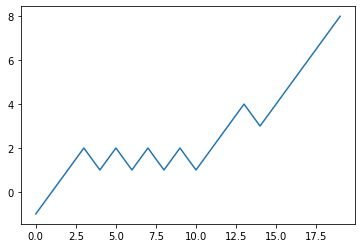

In [11]:
position = np.cumsum(steps)
print(position)

plt.plot(position)

## Ensemble of 1D random walkers

The `cumsum` function allows you to specify an axis along which to do the summation. With that you can create an ensemble of random walkers. Let's create a random array of the size 100x15, corresponding to 100 steps and 15 walkers:

In [13]:
steps = np.random.randint(2, size=(100,15)) * 2 - 1
steps

array([[-1,  1,  1, ...,  1, -1, -1],
       [ 1,  1,  1, ..., -1, -1,  1],
       [ 1, -1,  1, ..., -1, -1,  1],
       ...,
       [-1, -1,  1, ...,  1,  1,  1],
       [ 1, -1,  1, ..., -1, -1,  1],
       [-1, -1,  1, ..., -1, -1, -1]])

Keep track of the indices in use. The first index is *time*, the second index is the *walker*. Now do a cumulative sum along the time axis. You have to specify an axis, otherwise the entire array will be serialized before summing:

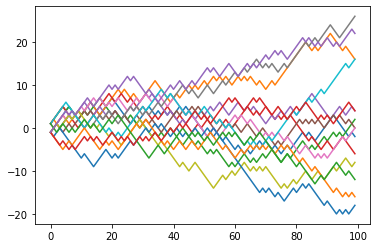

In [14]:
position = np.cumsum(steps, axis = 0)

plt.plot(position)
plt.show()

## Ensemble of `dim`D walkers

With a bit of advanced indexing you can easily create an ensemble of random walkers in arbitrary many dimensions. If you are a beginner and the method is too convoluted for you now, feel free to generate the step array with the help of `for` loops and `if` conditions. Performance will decrease significantly however.

Let's set some basic parameters:

In [15]:
N = 8       # Number of walkers
T = 10**4   # Number of time steps
dim = 25    # Dimensionality of space where walkers live

A walker in our case randomly steps forwards or backwards in a random direction. This is very different from combining `dim` independent 1D random walks, where the actual distance traveled can vary in each step.

First, for each walker and each point in time, randomly generate a forwards or backwards step.

In [16]:
delta = np.random.randint(2, size=(T,N)) * 2 - 1

Additionally, for each walker and each point in time, choose a random direction (*dimension*) to walk along:

In [17]:
direction = np.random.randint(dim, size=(T,N))

Use a meshgrid to generate the corresponding time and walker indices. `mgrid` is great for creating grids of indices:

In [18]:
t,n = np.mgrid[0:T,0:N]

Like in the 1D case with multiple walkers, we first generate an array containing the individual steps of the walks. The array now gets a third dimension, corresponding to the `dim` spatial dimensions of the step.

In [19]:
steps = np.zeros((T,N,dim))

We can now use our indices to select a *single* direction for *all* walkers at *all* times, and insert a step:

In [20]:
steps[t,n,direction] = delta

Sum along the time axis to get the random walks:

In [21]:
position = np.cumsum(steps, axis=0)

Finally, plot the walks. Choose two dimensions to your liking to project the walk onto the drawing plane:

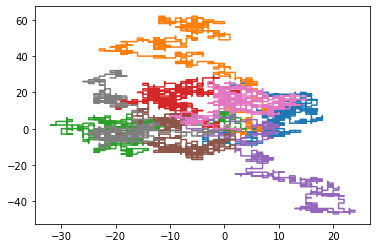

In [22]:
plt.plot(position[:,:,9], position[:,:,14])
plt.show()

Try choosing different values for the dimensionality of the space. Why do the walkers travel shorter distances in the above plot, when `dim` is higher?